# NMF Models

In [36]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [38]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 2023


In [39]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

# 1. `NMF` from `Sklearn`

In [40]:
# from models import NMFSklearn

# k = 15
# beta_loss = 'frobenius'
# init_method='nndsvd'
# solver = 'mu'

# model_nmf = NMFSklearn(k=k, beta_loss=beta_loss, init_method=init_method, solver=solver, max_iter=1000, seed=2024)
# model_nmf.fit(X_train=X_train)

In [41]:
# from utils import show_matrix, binarize, to_sparse

# X = model_nmf.U @ model_nmf.V.T
# X = binarize(X, 0.35)
# show_matrix([(X_train, [0, 0], 'X'), (X, [0, 1], 'X')], clim=[0, 1], colorbar=True, title='NMF')

In [42]:
# from utils import log2latex
# log2latex(model, 'updates')

In [43]:
# from utils import log2html
# log2html(model, 'updates')

# 2. `WNMF` from `PyBMF` with frobenius norm

[I] k            : 50
[I] U            : None
[I] V            : None
[I] W            : full
[I] tol          : 0.0
[I] min_diff     : 0.1
[I] max_iter     : 1000
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] beta_loss    : frobenius
[I] solver       : mu
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[W] Stopped in advance: Difference lower than threshold


train          
                                                 0          
                  time iter        error      RMSE       MAE
0    02/05/24 01:58:08    0  3599.496733  0.219074  0.079160
1    02/05/24 01:58:08    1  2886.303589  0.196174  0.077448
2    02/05/24 01:58:08    2  2804.666819  0.193379  0.079858
3    02/05/24 01:58:08    3  2738.472600  0.191084  0.081063
4    02/05/24 01:58:08    4  2641.333343  0.187664  0.082215
..                 ...  ...          ...       ...       ...
211  02/05/24 01:58:14  211  1417.257007  0.137465  0.050870
212  02/05/24 01:58:14  212  1417.148269  0.137460  0.050866
213  02/05/24 01:58:14  213  1417.043922  0.137455  0.050863
214  02/05/24 01:58:14  214  1416.943684  0.137450  0.050859
215  02/05/24 01:58:14  215  1416.847091  0.137446  0.050855

[216 rows x 5 columns]

d:\Dropbox\PyBMF\examples\..\utils\display.py:146: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, cnum).copy()


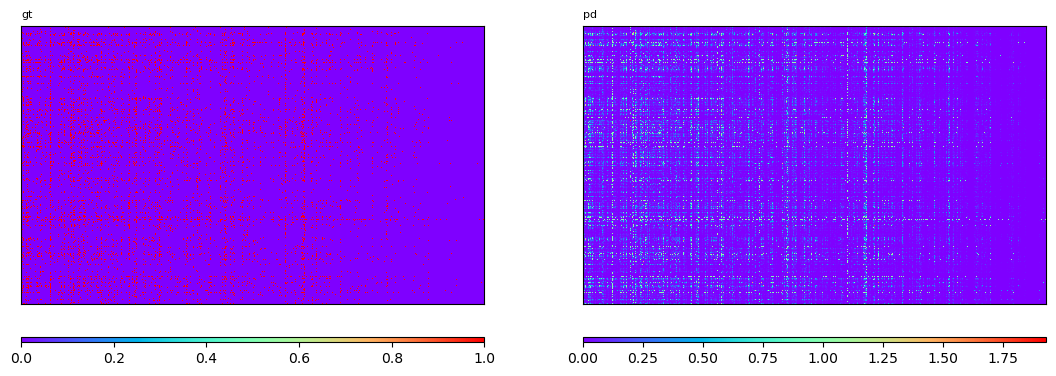

In [48]:
from models import WNMF

beta_loss = 'frobenius'
init_method ='normal'

model_wnmf = WNMF(k=50, W='full', beta_loss=beta_loss, init_method=init_method, solver='mu', min_diff=1e-1, max_iter=1000, seed=2024)
model_wnmf.fit(X_train=X_train, task='reconstruction')

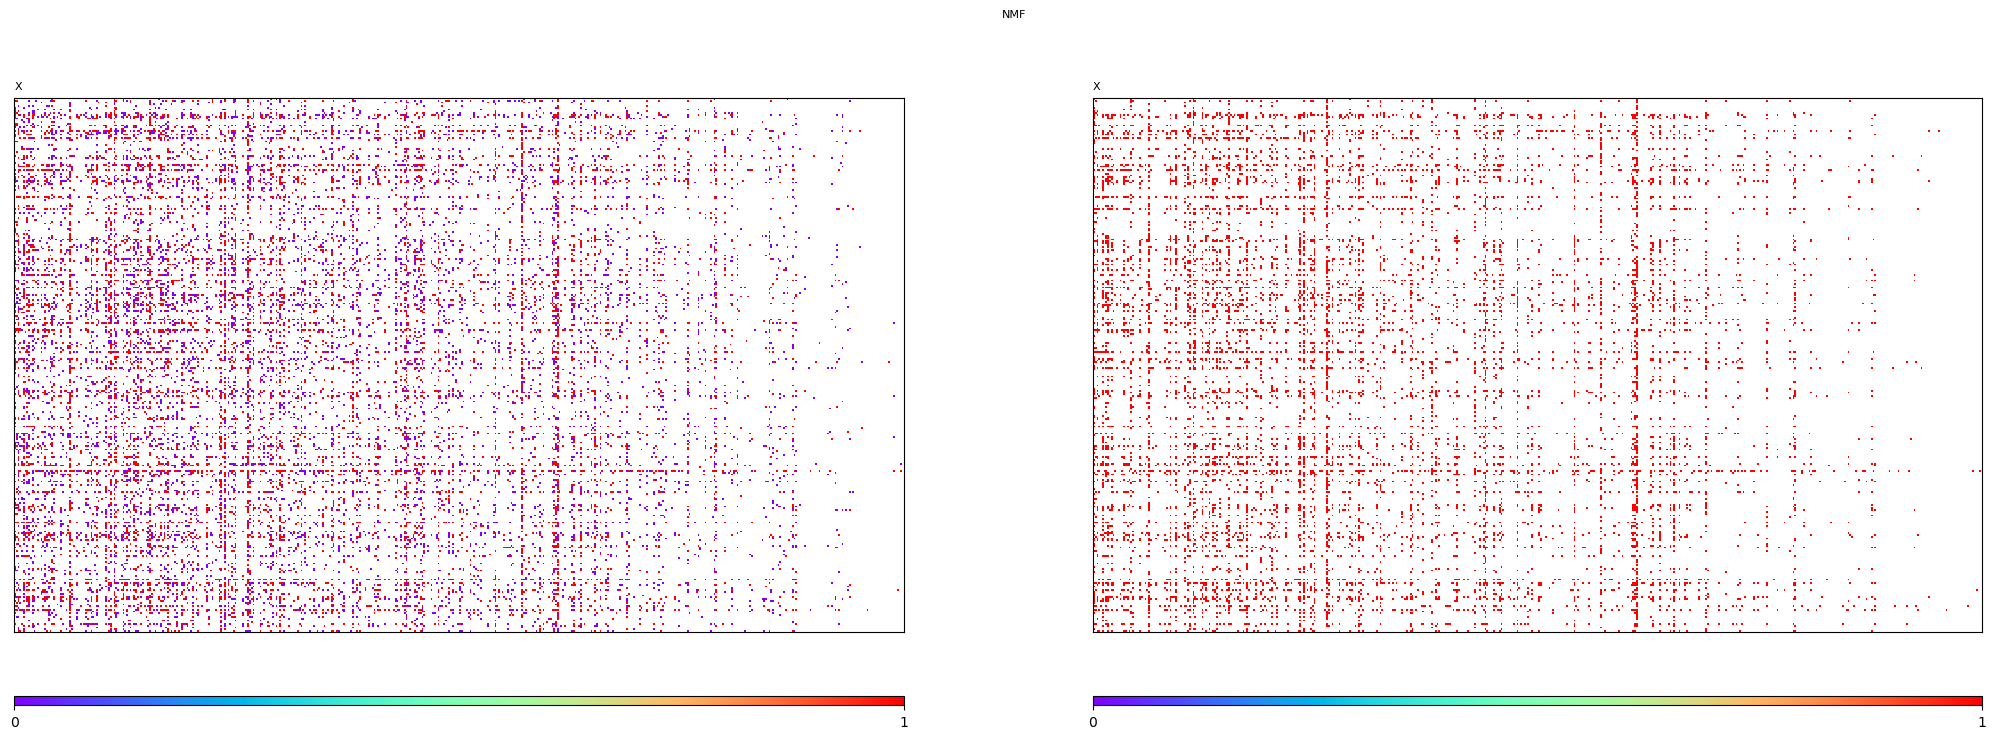

In [45]:
from utils import show_matrix, binarize, to_sparse

X = model_wnmf.U @ model_wnmf.V.T
X = binarize(X, 0.25)
X = to_sparse(X)

show_matrix([(X_train, [0, 0], 'X'), (X, [0, 1], 'X')], clim=[0, 1], colorbar=True, title='NMF')

# 3. `WNMF` from `PyBMF` (KL divergence)

In [46]:
# from models import WNMF

# beta_loss = 'kullback-leibler'
# init_method ='normal'

# model_wnmf = WNMF(k=k, W='full', beta_loss=beta_loss, init_method=init_method, solver='mu', min_diff=1e-1, max_iter=1000, seed=2024)
# model_wnmf.fit(X_train=X_train, task='reconstruction')

In [47]:
# from utils import show_matrix, binarize, to_sparse

# X = model_wnmf.U @ model_wnmf.V.T
# X = binarize(X, 0.35)
# X = to_sparse(X)

# show_matrix([(X_train, [0, 0], 'X'), (X, [0, 1], 'X')], clim=[0, 1], colorbar=True, title='NMF')